# ANÁLISIS EXPLORATORIO DE DATOS YELP!

## ÍNDICE
1. [INTRODUCCIÓN](#introducción)
2. [DESARROLLO](#desarrollo)
   1. [Importación de librerías](#importación-de-librerías)
   2. [Carga de datos](#carga-de-datos)
   3. [Chequeo de nulos](#chequeo-de-nulos)
   4. [Valores duplicados](#valores-duplicados)
   5. [Detección de outliers](#detección-de-outliers)
   6. [Tipos de datos](#tipos-de-datos)
   7. [Análisis extra](#análisis-extra)
3. [CONCLUSIONES](#conclusiones)


   




## INTRODUCCIÓN

Yelp! es una plataforma de reseñas de todo tipo de negocios, restaurantes, hoteles, servicios entre otros. Los usuarios utilizan el servicio y luego suben su reseña según la experiencia que han recibido. Esta información es muy valiosa para las empresas, ya que les sirve para enterarse de la imagen que tienen los usuarios de los distintos locales de la empresa, siendo útil para medir el desempeño, utilidad del local, además de saber en qué aspectos hay que mejorar el servicio.

Los objetivos del trabajo se enfocan en un estudio asociado a locales gastronómicos. Yelp! proporciona 5 datasets en formatos pkl, json y parquet, estos son:
- **business.pkl**, contiene información del comercio, incluyendo localización, atributos y categorías.
- **review.json**, contiene las reseñas completas, incluyendo el user_id que escribió el review y el business_id por el cual se escribe la reseña
- tip.json, son tips (consejos) escritos por el usuario. Los tips son más cortos que las reseñas y tienden a dar sugerencias rápidas. Se descarta este dataset, ya que presenta información similar a review, y este último tiene mayor cantidad de datos. 
- checkin.json, registros en el negocio. Por el momento no se trabaja este dataset, debido a la necesidad de la creación de una base de datos para darle contexto. De ser necesario esto sería parte del Sprint 2.
- user.parquet, data del usuario incluyendo referencias a otros usuarios amigos y a toda la metadata asociada al usuario. Se decide descartar este dataset debido a que el producto y analisis final no se reduciría solamente a usuarios de Yelp en específico, sino que a usuarios en general. 

Debido a todo esto, se decide centrar el EDA en los datasets **business** y **review**. A partir de estos, se crean dos archivos en formato parquet que sólo contienen información de locales gastronómicos referentes a los Estados Unidos.

## DESARROLLO

### Importación de librerias necesarias

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Esta librería evita la aparición de mensajes de ""warnings"".
import warnings
warnings.filterwarnings('ignore')

### Carga de datos

In [29]:
# Carga de archivos
df_business = pd.read_parquet('../data/df_business_gastronomic.parquet')

In [30]:
# Carga de archivos
df_review = pd.read_parquet('../data/df_review_gastronomic.parquet')

In [31]:
df_business.head(3)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Friday': '7:0-21:0', 'Monday': '7:0-20:0', '..."
1,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,AZ,37015,36.269593,-87.058943,2.0,6,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Friday': '9:0-0:0', 'Monday': '0:0-0:0', 'Sa..."
2,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,0,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Pubs, Restaurants, Italian, Bars, American (Tr...",None


In [32]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52268 entries, 0 to 52267
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   52268 non-null  object 
 1   name          52268 non-null  object 
 2   address       52268 non-null  object 
 3   city          52268 non-null  object 
 4   state         52268 non-null  object 
 5   postal_code   52268 non-null  object 
 6   latitude      52268 non-null  float64
 7   longitude     52268 non-null  float64
 8   stars         52268 non-null  float64
 9   review_count  52268 non-null  int64  
 10  is_open       52268 non-null  int64  
 11  attributes    51703 non-null  object 
 12  categories    52268 non-null  object 
 13  hours         44990 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 5.6+ MB


In [33]:
df_review.head(3)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
2,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03


In [34]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4724471 entries, 0 to 4724470
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   review_id    object 
 1   user_id      object 
 2   business_id  object 
 3   stars        float64
 4   useful       int64  
 5   funny        int64  
 6   cool         int64  
 7   text         object 
 8   date         object 
dtypes: float64(1), int64(3), object(5)
memory usage: 324.4+ MB


### Chequeo de nulos

In [35]:
# Chequeo de nulos en df_business

df_business.isnull().sum()

business_id        0
name               0
address            0
city               0
state              0
postal_code        0
latitude           0
longitude          0
stars              0
review_count       0
is_open            0
attributes       565
categories         0
hours           7278
dtype: int64

En el dataframe df_business, se observan presencia de nulos sólo en las columnas "attributes" y "hours". La cantidad de nulos en la columna "attributes" (565) representa el 1.08% de la totalidad de los registros; en el caso de "hours", la cantidad de nulos (7278) representa el 13.92% del total de registros.

Se propone completar los datos nulos de ambas columnas con el tipo de dato correspondiente, en este caso, diccionarios vacíos.

Total de valores nulos: 7843
Total de valores: 731752
Porcentaje de valores nulos: 1.07%


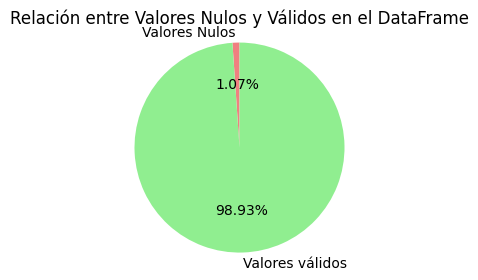

In [36]:
# Número total de valores nulos en el DataFrame
total_nulos = df_business.isnull().sum().sum()

# Número total de valores en el DataFrame
total_valores = df_business.size

# Porcentaje de valores nulos
porcentaje_nulos = (total_nulos / total_valores) * 100

print(f"Total de valores nulos: {total_nulos}")
print(f"Total de valores: {total_valores}")
print(f"Porcentaje de valores nulos: {porcentaje_nulos:.2f}%")

# Crear una lista de valores para el gráfico de torta
valores = [total_nulos, total_valores - total_nulos]
etiquetas = ['Valores Nulos', 'Valores válidos']
# Crear el gráfico de torta
plt.figure(figsize=(4, 3))
plt.pie(valores, labels=etiquetas, autopct='%1.2f%%', colors=['lightcoral', 'lightgreen'], startangle=90)
plt.title('Relación entre Valores Nulos y Válidos en el DataFrame')
plt.axis('equal')  
plt.show()




El gráfico anterior representa el porcentaje de nulos en df_business, por sobre la totalidad de datos (cada una de las celdas).

In [37]:
# Chequeo de nulos en df_review

df_review.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

En el dataframe df_review, no se observa presencia de nulos.

### Valores duplicados

Al revisar los valores duplicados en el dataframe df_business, se decide verificar duplicados en un subconjunto específico de columnas para evitar errores. Las columnas que deciden dejarse afuera, se debe a que presentan datos anidados.

In [38]:
# Verificar duplicados considerando solo ciertas columnas
columns_to_check = ['business_id', 'name', 'address', 'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars', 'review_count', 'is_open', 'categories']
business_duplicates = df_business[columns_to_check].duplicated()
print(f"Número de filas duplicadas en df_business: {business_duplicates.sum()}")



Número de filas duplicadas en df_business: 0


In [39]:
# Verificar duplicados en df_review
review_duplicates = df_review.duplicated()
print(f"Número de filas duplicadas en df_review: {review_duplicates.sum()}")

Número de filas duplicadas en df_review: 0


No se observa presencia de registros duplicados en ninguno de los dataframes.

### Detección de outliers

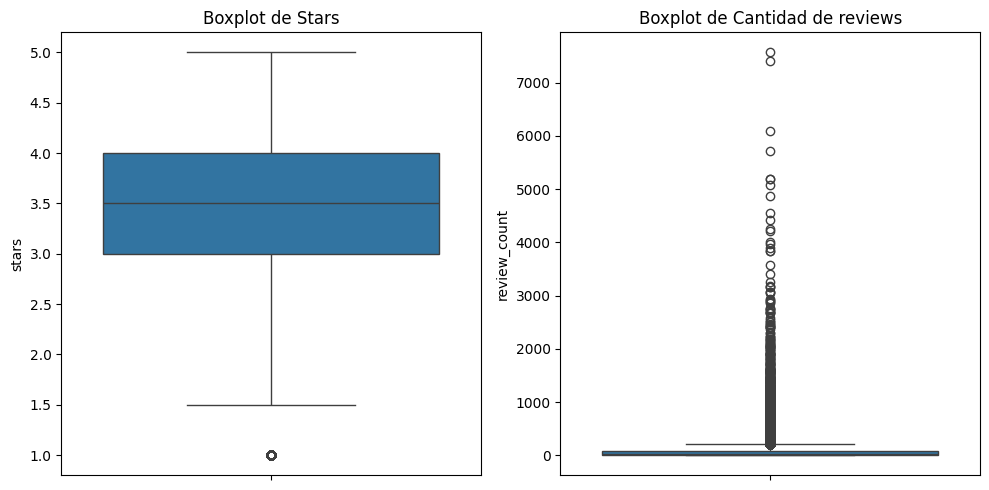

In [40]:
# Gráfico de outliers en df_business
# Configuración para gráficos
plt.figure(figsize=(10, 5))

# Primer subgráfico: Boxplot de 'stars'
plt.subplot(1, 2, 1)
sns.boxplot(y=df_business['stars'])
plt.title('Boxplot de Stars')

# Segundo subgráfico: Boxplot de 'review_count'
plt.subplot(1, 2, 2)
sns.boxplot(y=df_business['review_count'])
plt.title('Boxplot de Cantidad de reviews')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [41]:
# Calcular outliers para 'stars'
Q1_stars = df_business['stars'].quantile(0.25)
Q3_stars = df_business['stars'].quantile(0.75)
IQR_stars = Q3_stars - Q1_stars
lower_bound_stars = Q1_stars - 1.5 * IQR_stars
upper_bound_stars = Q3_stars + 1.5 * IQR_stars
outliers_stars = df_business[(df_business['stars'] < lower_bound_stars) | (df_business['stars'] > upper_bound_stars)]

# Calcular outliers para 'review_count'
Q1_review_count = df_business['review_count'].quantile(0.25)
Q3_review_count = df_business['review_count'].quantile(0.75)
IQR_review_count = Q3_review_count - Q1_review_count
lower_bound_review_count = Q1_review_count - 1.5 * IQR_review_count
upper_bound_review_count = Q3_review_count + 1.5 * IQR_review_count
outliers_review_count = df_business[(df_business['review_count'] < lower_bound_review_count) | (df_business['review_count'] > upper_bound_review_count)]

# Mostrar los valores y la cantidad de outliers
print(f'Outliers en "stars":\nNúmero de outliers: {outliers_stars.shape[0]}\nValores:\n{outliers_stars["stars"].tolist()}')
print(f'Outliers en "review_count":\nNúmero de outliers: {outliers_review_count.shape[0]}\nValores:\n{outliers_review_count["review_count"].tolist()}')


Outliers en "stars":
Número de outliers: 247
Valores:
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 

Si bien las columnas "stars" y "review_count" del dataframe df_business presentan outliers, esto no quiere decir que estos datos sean incorrectos. En el caso de "stars" el outlier corresponde a una minoría de locales con calificación muy baja, lo que sería información correcta. 
En el caso de "review_counts", los valores outliers se asocian a que hay determinados locales que presentan más reseñas que otros, probablemente debido a que son más concurridos.

Como se observa en el boxplot de "stars", la caja se concentra entre las calificaciones 3 a 4 estrellas. Esto tambien en parte, fundamenta la decisión de la elección del KPI 2 que tiene como objetivo mejorar el rating promedio de restaurantes, el cual se concentra en restaurantes de 3 a 4 estrellas.

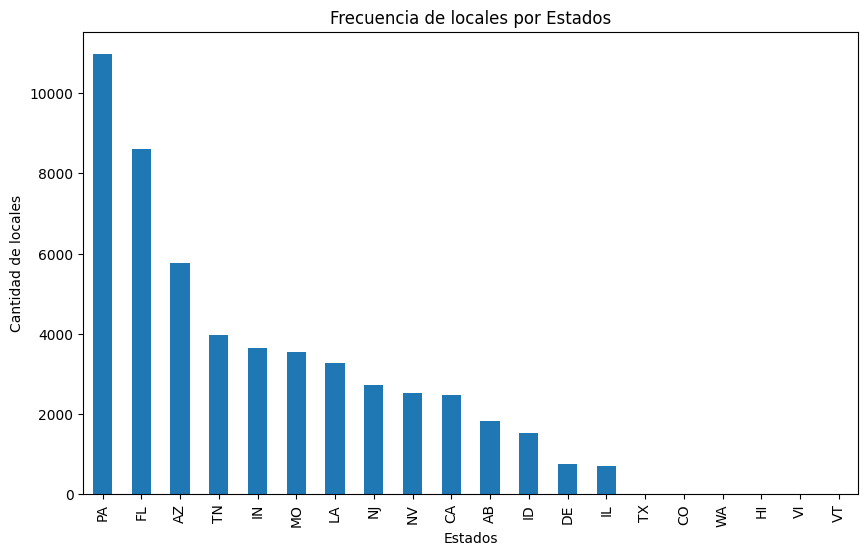

Outlier States: Index(['TX', 'CO', 'WA', 'HI', 'VI', 'VT'], dtype='object', name='state')


In [42]:
# Contar la frecuencia de cada categoría en la columna 'state'
state_counts = df_business['state'].value_counts()

# Visualizar las frecuencias
plt.figure(figsize=(10,6))
state_counts.plot(kind='bar')
plt.xlabel('Estados')
plt.ylabel('Cantidad de locales')
plt.title('Frecuencia de locales por Estados')
plt.show()

# Identificar estados con frecuencias muy bajas (outliers)
threshold = 10  # Por ejemplo, considerar estados con menos de 10 negocios como outliers
outlier_states = state_counts[state_counts < threshold].index

print("Outlier States:", outlier_states)


En el gráfico se puede observar que según los datos de Yelp!, Pensilvania y Florida son los que más locales gastronómicos presentan. 

En este caso, se proponen como outlier aquellos estados que presentan menos de 10 negocios. Estados como Texas, Connecticut, Washington, Hawaii, entre otros, podrían considerarse outliers dentro del criterio presentado.

Esto no necesariamente significa que estos estados no tengan locales gastronómicos, sino, puede que no esté normalizado el uso de la aplicación o en su defecto, el dataset proporcionado por Yelp! se encuentre incompleto.

Por lo tanto, se sugiere que al tratar estados importantes como Texas y California, el análisis de datos se base principalmente en los datasets de Google.

A continuación se detalla la cantidad de registros de locales gastronómicos por estado proporcionados por Yelp!.

In [43]:
df_business["state"].value_counts()

state
PA    10987
FL     8614
AZ     5765
TN     3966
IN     3636
MO     3540
LA     3269
NJ     2729
NV     2520
CA     2466
AB     1808
ID     1516
DE      753
IL      692
TX        2
CO        1
WA        1
HI        1
VI        1
VT        1
Name: count, dtype: int64

A continuación, se observa un gráfico boxplot de la presencia de outliers en la columna "stars" del dataframe df_review.

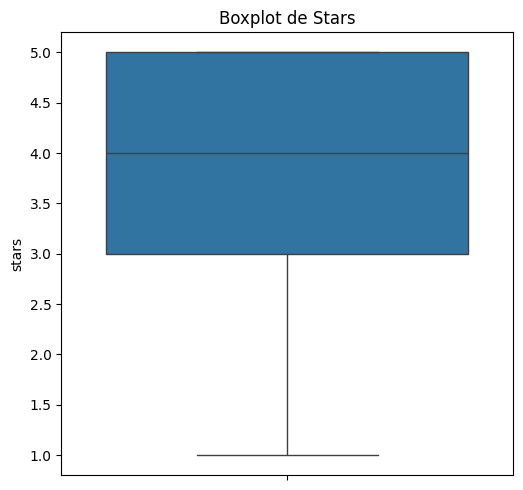

In [44]:
#Gráfico de outliers en df_review
# Configuración para gráficos
plt.figure(figsize=(10, 5))

# Primer subgráfico: Boxplot de 'stars'
plt.subplot(1, 2, 1)
sns.boxplot(y=df_review['stars'])
plt.title('Boxplot de Stars')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [45]:
# Calcular outliers para 'stars'
Q1_stars = df_review['stars'].quantile(0.25)
Q3_stars = df_review['stars'].quantile(0.75)
IQR_stars = Q3_stars - Q1_stars
lower_bound_stars = Q1_stars - 1.5 * IQR_stars
upper_bound_stars = Q3_stars + 1.5 * IQR_stars
outliers_stars = df_review[(df_review['stars'] < lower_bound_stars) | (df_review['stars'] > upper_bound_stars)]

# Mostrar los valores y la cantidad de outliers
print(f'Outliers en "stars":\nNúmero de outliers: {outliers_stars.shape[0]}\nValores:\n{outliers_stars["stars"].tolist()}')


Outliers en "stars":
Número de outliers: 0
Valores:
[]


No se observan outliers en la columna "stars" del dataframe df_review.

### Tipos de datos

In [46]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52268 entries, 0 to 52267
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   52268 non-null  object 
 1   name          52268 non-null  object 
 2   address       52268 non-null  object 
 3   city          52268 non-null  object 
 4   state         52268 non-null  object 
 5   postal_code   52268 non-null  object 
 6   latitude      52268 non-null  float64
 7   longitude     52268 non-null  float64
 8   stars         52268 non-null  float64
 9   review_count  52268 non-null  int64  
 10  is_open       52268 non-null  int64  
 11  attributes    51703 non-null  object 
 12  categories    52268 non-null  object 
 13  hours         44990 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 5.6+ MB


In [47]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4724471 entries, 0 to 4724470
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   review_id    object 
 1   user_id      object 
 2   business_id  object 
 3   stars        float64
 4   useful       int64  
 5   funny        int64  
 6   cool         int64  
 7   text         object 
 8   date         object 
dtypes: float64(1), int64(3), object(5)
memory usage: 324.4+ MB


Se observa el tipo de dato correspondiente para lo que quiere representar cada categoría.

### Análisis extra

En el siguiente gráfico se pueden observar la cantidad relativa de reseñas por estado según el dataframe df_business

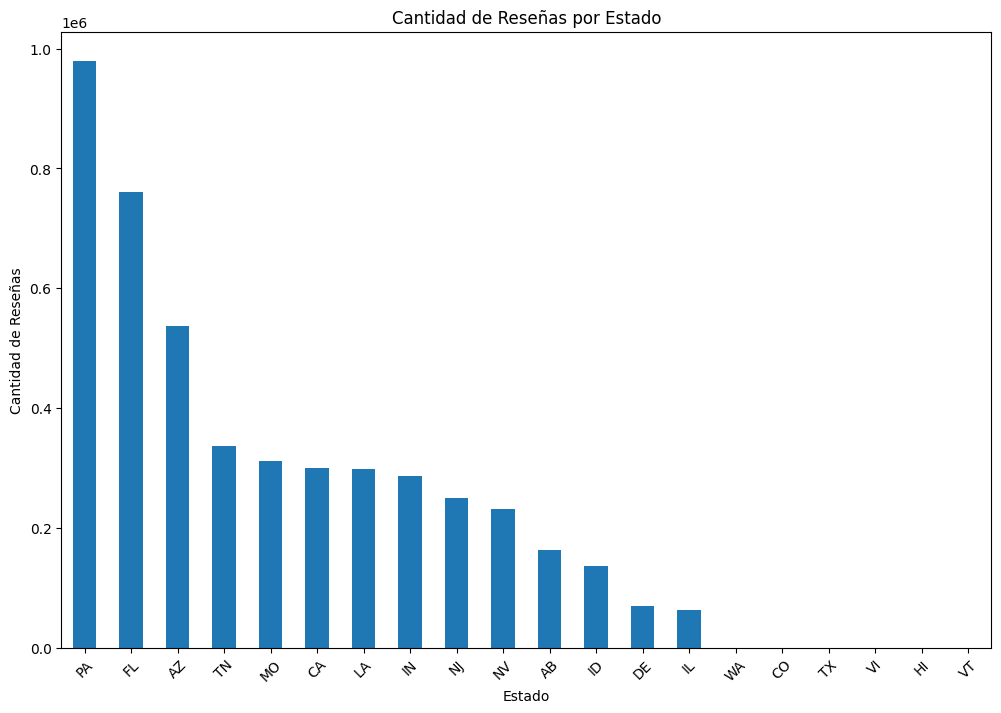

In [48]:
# Gráfico de cantidad de reseñas por estado.

# Realizar el merge de los dataframes usando business_id como clave
merged_df = pd.merge(df_review, df_business[['business_id', 'state']], on='business_id')

# Contar la cantidad de reseñas por estado
review_counts_by_state = merged_df['state'].value_counts()

# Graficar los datos
plt.figure(figsize=(12, 8))
review_counts_by_state.plot(kind='bar')
plt.title('Cantidad de Reseñas por Estado')
plt.xlabel('Estado')
plt.ylabel('Cantidad de Reseñas')
plt.xticks(rotation=45)
plt.show()

A partir del gráfico anterior, se deduce que los estados con mayor actividad de reseñas en Yelp! son Pensilvania y Florida. Esto en parte, acompaña la decisión del alcance del proyecto a los estados más poblados.

Por otro lado, se refundamenta la necesidad de contar con los datos de Google para estados importantes como Texas, New York y California.

En el siguiente gráfico se observa el top de 20 negocios con más reseñas.

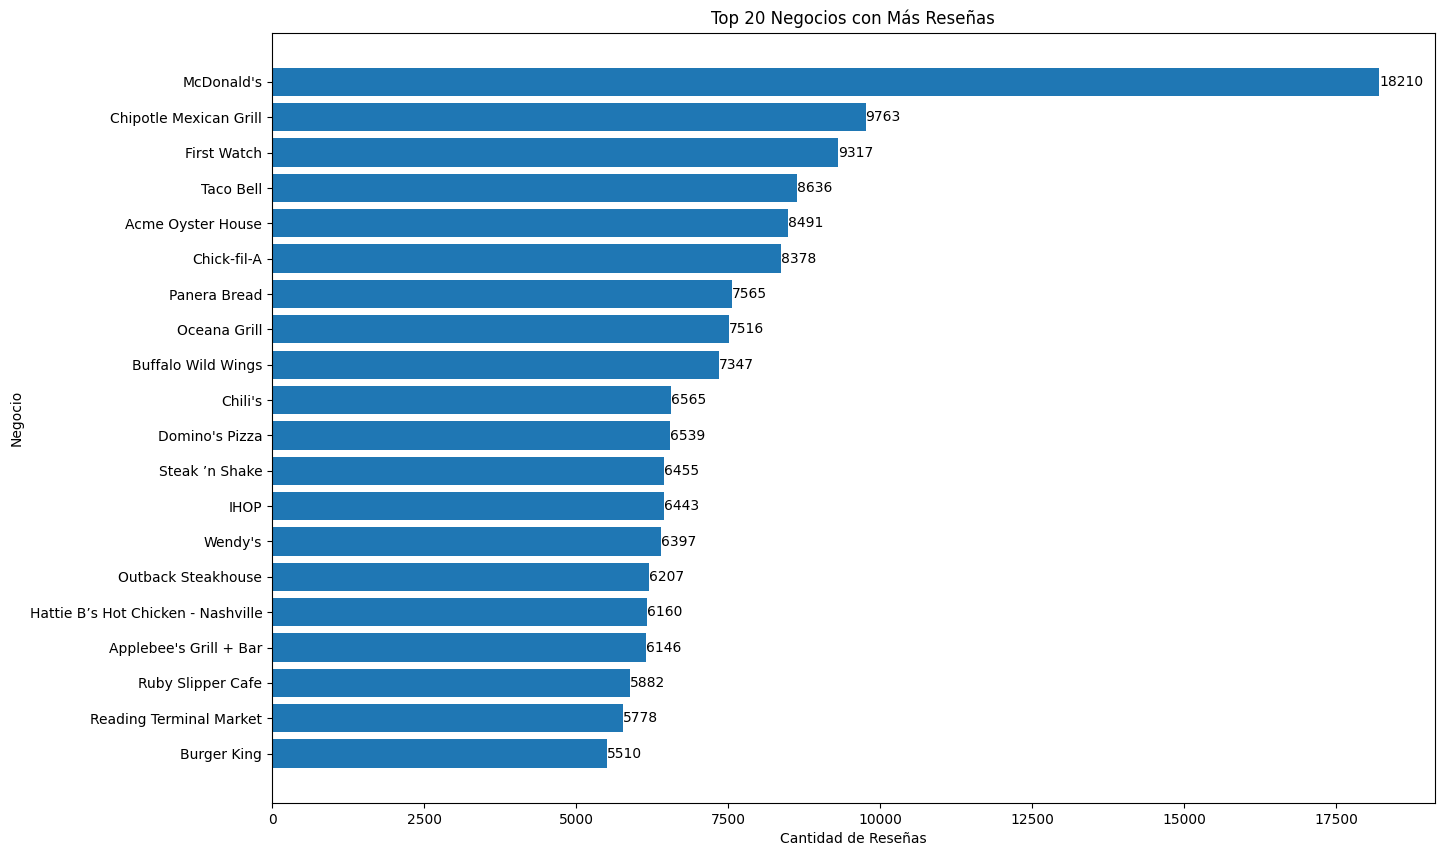

In [49]:
# Gráfico con Top 20 negocios con más reseñas.
# Unir los DataFrames en la columna 'business_id'
df_merged = pd.merge(df_review, df_business, on='business_id', how='inner')

# Contar la cantidad de reseñas por negocio
review_counts = df_merged.groupby('name')['text'].count().reset_index()
review_counts.columns = ['name', 'review_count']

# Ordenar por la cantidad de reseñas, de mayor a menor
review_counts = review_counts.sort_values(by='review_count', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(15, 10))
bars = plt.barh(review_counts['name'].head(20), review_counts['review_count'].head(20))

# Añadir etiquetas con la cantidad de reseñas
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center')

plt.xlabel('Cantidad de Reseñas')
plt.ylabel('Negocio')
plt.title('Top 20 Negocios con Más Reseñas')
plt.gca().invert_yaxis()
plt.show()

Dentro de los negocios con más reseñas, se observa que la franquicia McDonald's lidera el top 20. Por otro lado, se observan otras franquicias asociadas a comida rápida, cómida mexicana, entre otros. Esto indicaría la preferencia por franquicias y tipos de comida específica.

Al cruzar estos datos con los de Google, se podría utilizar para proponer la apertura de ciertos locales según la preferencia de los usuarios en ciudades donde todavía no se encuentran, como maneras de alcanzar el KPI 1 que busca aumentar la cantidad de restaurantes.

En el siguiente gráfico se muestra la cantidad de reseñas por la calificación en restaurantes según el dataframe df_business.

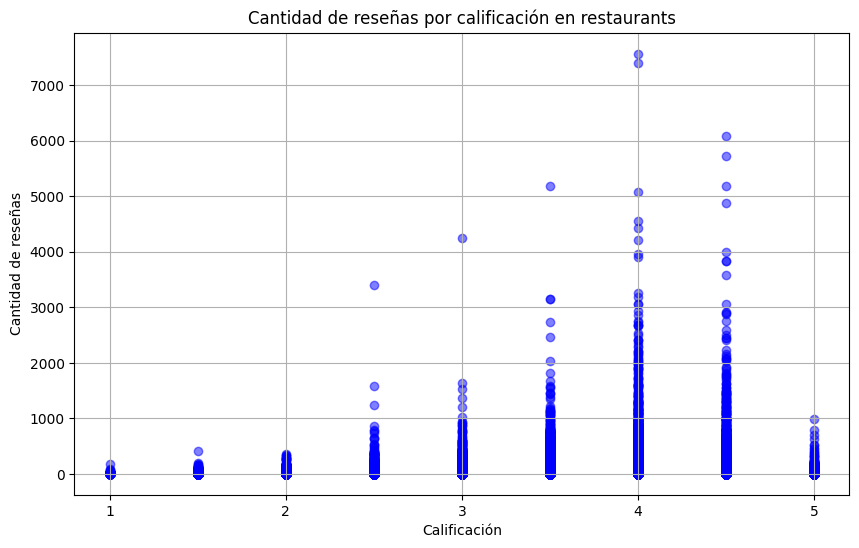

In [50]:
# Gráfico de cantidad de reseñas por calificación en restaurantes

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df_business["stars"], df_business["review_count"], color='b', alpha=0.5)
plt.xlabel('Calificación')
plt.ylabel('Cantidad de reseñas')
plt.title('Cantidad de reseñas por calificación en restaurants')
plt.xticks([1, 2, 3, 4, 5])
plt.grid(True)
plt.show()


In [51]:
# Contar la cantidad de restaurantes según su calificación
reviews_by_stars = df_business['stars'].value_counts().sort_index(ascending=False)

# Mostrar el resultado
print(reviews_by_stars)

stars
5.0     1553
4.5     8357
4.0    13438
3.5    11794
3.0     7639
2.5     4850
2.0     2909
1.5     1481
1.0      247
Name: count, dtype: int64


En el gráfico de dispersión se observa un mayor número de reseñas de Yelp en restaurantes con calificaciones comprendidas entre 3.5 y 4 estrellas. A continuación del mismo se puede observar la cantidad de reseñas por calificación.

Este dato tambien fundamentaría la decisión de centrar el KPI 2 en mejorar el rating promedio de restaurantes con calificaciones comprendidas entre 3 y 4 estrellas.

El gráfico siguiente, expresa la cantidad de reseñas por calificación, seguido del conteo de las mismas

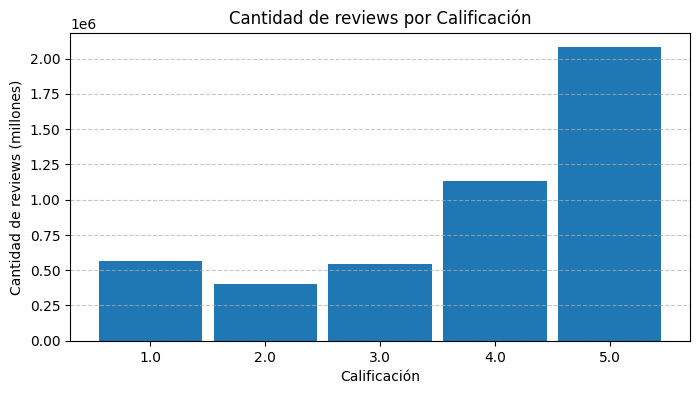

stars
5.0    2079441
4.0    1130251
3.0     543108
2.0     404486
1.0     567185
Name: count, dtype: int64


In [52]:

reviews_by_stars = df_review['stars'].value_counts().sort_index(ascending=True)

# Crear el gráfico de barras
plt.figure(figsize=(8, 4))
reviews_by_stars.plot(kind='bar', width=0.9)  # Ajustar el ancho de las barras
plt.title('Cantidad de reviews por Calificación')
plt.xlabel('Calificación')
plt.ylabel('Cantidad de reviews (millones)')
plt.xticks(rotation=0)  # Mantener las etiquetas de las barras horizontales
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()

# Contar la cantidad de restaurantes según su calificación
reviews_by_stars = df_review['stars'].value_counts().sort_index(ascending=False)
# Mostrar el resultado
print(reviews_by_stars)

Claramente, se observa una mayor tendencia por parte de los clientes a dejar una mayor cantidad de reseñas con valoraciones altas cuando tienen una buena experiencia.
Por lo tanto, para aumentar la cantidad de reviews es indispensable mejorar la calidad del servicio.

Se podría proponer un análisis de sentimiento en las reseñas negativas para detectar cuales son los aspectos a mejorar.

## CONCLUSIONES

A partir del análisis exploratorio de los datos proporcionados por Yelp!, se determina que:

- Se decide trabajar principalmente con los datasets df_business y df_review.

- La cantidad de datos nulos corresponde a alrededor del 1% de la totalidad de los datos lo cual se considera despreciable. Se propone durante el ETL completar los datos nulos de ambas columnas con el tipo de dato correspondiente, en este caso, diccionarios vacíos.

- Determinados locales presentan considerablemente más reseñas que otros. Por ejemplo, es notorio el caso de la empresa McDonald's (negocio con mayor cantidad de reseñas), la cual duplica en cantidad al segundo puesto. Probablemente esto se debe a la popularidad y expansión de dicha franquicia. El top 20 de negocios con más reseñas ofrece información acerca la preferencia por determinadas franquicias y tipos de comida.

- Los datos proporcionados por Yelp presentan una mayor cantidad de reseñas en estados como Pensilvania y Florida los cuales se encuentran dentro del alcance del proyecto.

- Pensilvania y Florida son los estados que presentan mayor cantidad de locales gastronómicos.

- Se observa una carencia notoria en los datos proporcionados por Yelp en cuanto a estados dentro del alcance del proyecto como Texas, California y New York. Por lo tanto, el analisis de estos estados recaería principalmente en datos proporcionados por Google.


- Si bien predominan las calificaciones comprendidas de 3.5 a 4.5 estrellas. Se propone orientar las propuestas de mejora a los locales valorados entre 3 y 4 estrellas ya que presentan un mayor margen de crecimiento.  

- Clientes con una muy buena experiencia en los locales, dejan mayor cantidad de reseñas con respecto a clientes insatisfechos. De esto se desprende que para aumentar la cantidad de reviews, es indispensable mejorar la calidad de servicio. 
